<a href="https://colab.research.google.com/github/Danieli4/Forecast/blob/master/%D0%9F%D0%BE%204%20%D1%86%D0%B8%D1%84%D1%80%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# multivariate output 1d cnn example
#import tf as tf
from numpy import array
import tensorflow as tf
import numpy as np
import pandas as pd
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, LSTM, LeakyReLU
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D, Conv2D
from keras.layers.convolutional import MaxPooling1D
from keras.preprocessing.sequence import TimeseriesGenerator

import matplotlib.pyplot as plt



In [ ]:
# horizontally stack columns
#dataset_new = hstack((in_seq1, in_seq2, in_seq3, in_seq4, in_seq5, in_seq6))
#dataset_new= np.array(range(0,54,1)).reshape(9,6)
dataset_new=np.random.randint(1,20,12000).reshape(2000,6)
#%%

validat_x = dataset_new[-101:-1]
validat_y = dataset_new[-1:]
validat_y

#%%

# нужно вычесть 5429+validat_x[!это!:]
dataset = dataset_new[:199899]


In [ ]:
#f = open("/4-20.xlsx";"w",encoding="unicode")
data= pd.read_csv("/4-20.csv", sep = ';')
data
dataset_n = data[['1','2','3','4']]
print (data.columns)
validat_x = dataset_n[-101:-1]
validat_y = dataset_n[-1:]
validat_x
dataset = dataset_n[:2810].to_numpy()
dataset.shape
dataset_val = data[['1','2','3','4']][:2910].to_numpy()
dataset_val

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8'], dtype='object')


array([[20,  2, 10,  4],
       [12,  6, 20, 17],
       [ 5, 19, 18, 17],
       ...,
       [ 8,  4,  9, 15],
       [ 5, 15, 17, 20],
       [10, 13, 11, 15]])

In [ ]:

#%%
n_input = 100
generator = TimeseriesGenerator(dataset, dataset, length=n_input, batch_size=20)
print (generator)
# for i in range(len(generator)):
#   x, y = generator[i]
#   print('%s => %s' % (x, y))

In [ ]:
x_val = array([validat_x])
y_val = array( validat_y)
#print (x_val)
print (y_val)

[[15 12  1  8]]


In [ ]:
# the dataset knows the number of features, e.g. 2
#n_features = X.shape[2]
n_features = 4
# define model
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(100, n_features)))
#model.add(BatchNormalization())
#model.add(Conv1D(filters=64, kernel_size=45, activation='relu', input_shape=(395, 64)))
#model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(250))
#model.add(LeakyReLU())
model.add(Flatten())
model.add(Dense(600, activation='relu'))
model.add(Dense(600, activation='relu'))
model.add(Dense(600, activation='relu'))
model.add(Dense(600, activation='relu'))

model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')
# fit model
#model.fit(X, y, epochs=3, verbose=1)
callbacks = [
  # Остановить обучение если `val_loss` перестанет улучшаться в течение 2 эпох
  tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss'),
  # Записать логи TensorBoard в каталог `./logs` directory
  tf.keras.callbacks.TensorBoard(log_dir='./logs')
]
history = model.fit(generator, epochs=1500, verbose=2, validation_data=(generator))#, callbacks=callbacks)
print("Ok!")
# demonstrate prediction

#%%


Epoch 1/1500
136/136 - 5s - loss: 37.3117 - val_loss: 36.1848
Epoch 2/1500
136/136 - 2s - loss: 34.4956 - val_loss: 33.4129
Epoch 3/1500
136/136 - 2s - loss: 33.9273 - val_loss: 34.1289
Epoch 4/1500
136/136 - 2s - loss: 34.0790 - val_loss: 33.6347
Epoch 5/1500
136/136 - 2s - loss: 34.3245 - val_loss: 34.5682
Epoch 6/1500
136/136 - 2s - loss: 34.0648 - val_loss: 34.1350
Epoch 7/1500
136/136 - 2s - loss: 33.9902 - val_loss: 34.4062
Epoch 8/1500
136/136 - 2s - loss: 33.9524 - val_loss: 33.5521
Epoch 9/1500
136/136 - 2s - loss: 33.7808 - val_loss: 33.8913
Epoch 10/1500
136/136 - 2s - loss: 33.7213 - val_loss: 33.4013
Epoch 11/1500
136/136 - 2s - loss: 34.0176 - val_loss: 33.3568
Epoch 12/1500
136/136 - 2s - loss: 33.8906 - val_loss: 33.9165
Epoch 13/1500
136/136 - 2s - loss: 33.7669 - val_loss: 33.9487
Epoch 14/1500
136/136 - 2s - loss: 33.6602 - val_loss: 33.4724
Epoch 15/1500
136/136 - 2s - loss: 33.9496 - val_loss: 33.2771
Epoch 16/1500
136/136 - 2s - loss: 33.8808 - val_loss: 33.4049
E

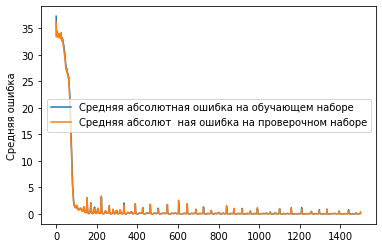

[[ 9.472468 14.895511 14.213834  8.10924 ]]
dval [[15 12  1  8]]
[[[18  4  3 10]
  [12 14  5  7]
  [ 4 12  2  6]
  [19 15  8 11]
  [12 19 17  8]
  [14  4 10  5]
  [ 9 16 12 15]
  [12  9  7 18]
  [12 15  7 11]
  [17 12 15 14]
  [ 4 19 16 20]
  [20 19  3 10]
  [13 20  2  9]
  [ 9 12  3  6]
  [20 12 18  6]
  [ 7 16  4  2]
  [ 2  6 12 20]
  [10 19  3 11]
  [ 2  7 18 17]
  [ 5 17  3  2]
  [15 10 19 16]
  [ 3 15 13 16]
  [ 9  6 18  3]
  [ 4 20 13 17]
  [ 5 13 17 11]
  [14 19 17 10]
  [17  6 19  5]
  [15  7  9  8]
  [16  6  4  1]
  [ 2  5  3  7]
  [ 9  2 17 20]
  [ 8 14  1 17]
  [ 2 14 17  8]
  [14 20  4  1]
  [15  8 17 11]
  [16 13 18 17]
  [16 15  2  8]
  [19 13 15 20]
  [ 5  3 10 18]
  [ 8 12  4  2]
  [ 4 10 16  7]
  [20 18  9  5]
  [20  5 19 10]
  [ 6 17 20 10]
  [ 2  3  7 11]
  [15  2 18 19]
  [ 6 16 19 14]
  [ 4 17 16  8]
  [15 11 14  2]
  [ 4  5 19 16]
  [ 1  5 16  4]
  [20  3 12  6]
  [10 12 14 20]
  [13  3  7 15]
  [ 4  6 13 17]
  [15 11 17  5]
  [15 19  3 17]
  [19 14 13 12]
  [ 8  

In [ ]:

plt.plot(history.history['loss'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Средняя абсолют  ная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

#%%

# x_input = array([[70,71,72,73,74,75], [76,77,78,79,80,81], [82,83,84,85,86,87]])
# x_input = x_input.reshape((1, 3, n_features))
x_input = array([dataset_val[-100:]])
yhat = model.predict(x_input, verbose=0)
print(yhat)
print("dval",y_val)
print(x_input)
print(y_val-yhat)